In [18]:
import netCDF4 as nc
import numpy as np

# Metadata

In [19]:
path = "/media/sf_VM_Folder/data/Vic2019/Ef_M2_S2_K1_AH_corrected.nc"
ds = nc.Dataset(path)

In [20]:
print(ds.__dict__)
print(ds)

{}
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): nmodes(10), ny(321), nx(721)
    variables(dimensions): float32 Ef(ny, nx), float32 Ef8c(ny, nx), float32 Efn(ny, nx, nmodes), float32 Efn8c(ny, nx, nmodes), float32 lon(ny, nx), float32 lat(ny, nx), float32 h(ny, nx)
    groups: 


In [21]:
for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'nmodes', size = 10
<class 'netCDF4._netCDF4.Dimension'>: name = 'ny', size = 321
<class 'netCDF4._netCDF4.Dimension'>: name = 'nx', size = 721


In [22]:
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float32 Ef(ny, nx)
unlimited dimensions: 
current shape = (321, 721)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 Ef8c(ny, nx)
unlimited dimensions: 
current shape = (321, 721)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 Efn(ny, nx, nmodes)
unlimited dimensions: 
current shape = (321, 721, 10)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 Efn8c(ny, nx, nmodes)
unlimited dimensions: 
current shape = (321, 721, 10)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 lon(ny, nx)
unlimited dimensions: 
current shape = (321, 721)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 lat(ny, nx)
unlimited dimensions: 
current shape = (321, 721)
filling on, default _FillValue of

* float Ef(ny, nx) ; total conversion in M2
* float Ef8c(ny, nx) ; total conversion into first 8 components 
* float Efn(ny, nx, nmodes) ; conversion in M2 mode by mode (first 10 modes) 
* float Efn8c(ny, nx, nmodes) ; conversion into first 8 components (first 10 modes) 
* float lon(ny, nx) ; longitude 
* float lat(ny, nx) ; latitude 
* float h(ny, nx) ; grid bathymetry 

In [23]:
lat = ds.variables['lat'][:] # latitude grid points
lon = ds.variables['lon'][:] # longitude grid points
depth = ds.variables['h'][:] # depth grid points

Ef = ds.variables['Ef'] #.filled(np.nan)
Efn = np.asarray(ds.variables['Efn']) #.filled(np.nan)
#Efn8c = ds.variables['Efn']

print(f"Shape of lon:     {lon.shape}")#, {lon[0]:.1f}, {lon[-1]:.1f}")
print(f"Shape of lat:     {lat.shape}")#, {lat[0]:.1f}, {lat[-1]:.1f}")
print(f"Shape of depth:   {depth.shape}")#, {depth[0]}, {depth[-1]:.1f}")
print(f"Shape of Ef:      {Ef.shape}")
print(f"Shape of Efn:     {Efn.shape}")
#print(f"Shape of Efn8c:   {Efn8c.shape}")

Shape of lon:     (321, 721)
Shape of lat:     (321, 721)
Shape of depth:   (321, 721)
Shape of Ef:      (321, 721)
Shape of Efn:     (321, 721, 10)


In [24]:
type(Efn)

numpy.ndarray

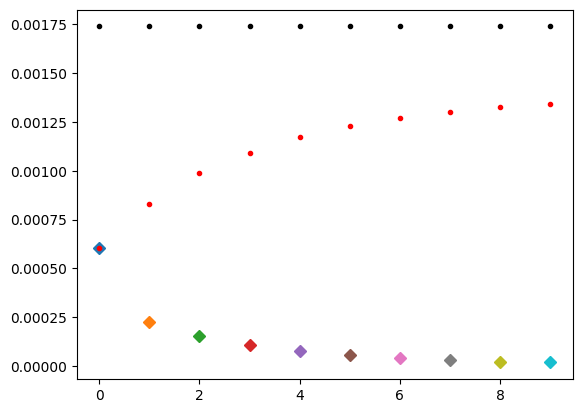

In [25]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.plot(i,np.nanmean(Efn[:,:,i]),"D")
    plt.plot(i,np.nanmean(Ef),"k.")    
    plt.plot(i,np.nanmean(np.sum(Efn[:,:,:i+1], axis = 2)),"r.")

In [26]:
t = (Ef - Efn[:,:,:3].sum(axis=2))
np.nanmean(t) 

0.0007587906

$q = E^{4-\infty}_\text{M2}/ E^{1-\infty}_\text{M2}$

In [27]:
q = (Ef - Efn[:,:,:3].sum(axis=2)) / Ef
q.shape

/tmp/ipykernel_61205/2229205281.py:1: RuntimeWarning: invalid value encountered in divide
  q = (Ef - Efn[:,:,:3].sum(axis=2)) / Ef


(321, 721)

In [28]:
print(np.nanmin(q),np.nanmax(q))

-0.7766719 1.0


# Plot Southern Ocean 

In [29]:
import matplotlib.path as mpath
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean as cm

In [30]:
def setup_south_polar(fig):
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

    # Limit the map to -60 degrees latitude and below.
    ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    # Add land and ocean features to the map
    ax.add_feature(cfeature.LAND, color="grey")
    # ax.add_feature(cfeature.OCEAN)

    # Draw gridlines on the map
    # If labels are drawn, can be chosen here
    ax.gridlines(draw_labels=False)

    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    # Set the circular boundary for the map using the transformed circle path
    ax.set_boundary(circle, transform=ax.transAxes)    
    
    return ax

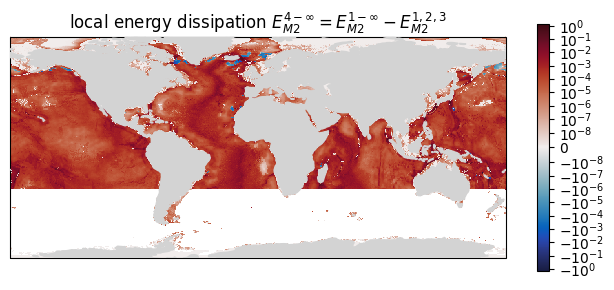

In [31]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color="lightgrey", alpha=1, zorder = 10)
im = ax.pcolormesh(lon, lat, t, transform=ccrs.PlateCarree(), cmap = cm.cm.balance, norm = mcolors.SymLogNorm(linthresh = 1e-8, vmin = - np.nanmax(np.abs(t)), vmax = np.nanmax(np.abs(t))))
#plt.title(r"$q = E^{4-\infty}_{M2} / E^{1-\infty}_{M2}$")
plt.title(r"local energy dissipation $E^{4-\infty}_{M2} = E^{1-\infty}_{M2} - E^{1,2,3}_{M2}$")
plt.colorbar(im, orientation='vertical', shrink = 0.4);
plt.savefig("./output2.png", bbox_inches = "tight", dpi = 300)

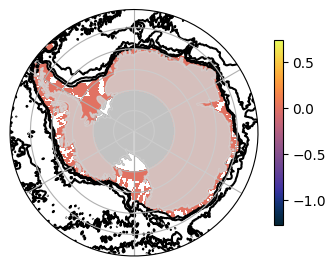

In [40]:
fig = plt.figure(figsize=[4, 4])
ax = setup_south_polar(fig)
im = ax.pcolormesh(lon, lat, t, transform=ccrs.PlateCarree(), cmap = cm.cm.thermal)
ax.add_feature(cfeature.LAND, color="lightgrey", alpha=0.8, zorder = 10)
ax.contour(lon, lat, depth, transform=ccrs.PlateCarree(), levels = np.linspace(-5000,0,5), colors = "k", linestyles = "solid") #levels = np.linspace(-0.7,-0.3,4)
plt.colorbar(im, orientation='vertical', shrink = 0.6);

# Weddell Sea

In [33]:
def setup_Weddell_Sea(fig):
    
    # Import the necessary libraries
    import matplotlib.pyplot as plt
    import matplotlib.path as mpath
    import cartopy.mpl.patch as cpatch
    import matplotlib.patches as patches
    import matplotlib.ticker as mticker

    # Define the projection for a high-resolution South Polar Stereographic map
    high_res_proj = ccrs.SouthPolarStereo(central_longitude=-50)
    high_res_proj.threshold = 1e3

    ax = fig.add_subplot(111, projection=high_res_proj)
    ax.add_feature(cfeature.LAND, color="grey")

    # Define the limits for the x-axis and y-axis of the map
    xlim = [-80, -20] # longitude
    ylim = [-60, -80] # latitude

    # Define a rectangular path for the map extent using matplotlib's Path object
    rect = mpath.Path([[xlim[0], ylim[0]],
                       [xlim[1], ylim[0]],
                       [xlim[1], ylim[1]],
                       [xlim[0], ylim[1]],
                       [xlim[0], ylim[0]],
                       ])

    # Transform the rectangular path to the data coordinate system
    proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
    rect_in_target = proj_to_data.transform_path(rect)

    # Set the boundary of the map using the transformed rectangular path
    ax.set_boundary(rect_in_target)

    # Configure gridlines for the map
    gl = ax.gridlines(
        draw_labels=["top", "right", "x", "y"],
        rotate_labels=True, x_inline=False)

    # Draw latitude and longitude gridlines (and their labels)
    # only at the specified values
    lathelp = np.arange(-75, -60, 5)
    gl.ylocator = mticker.FixedLocator(lathelp)
    lonhelp = np.arange(-80, -10, 10)
    gl.xlocator = mticker.FixedLocator(lonhelp)

    # Rotate the longitude labels to be more readable
    gl.xlabel_style = {'rotation': 30}

    # To make sure that all of the wanted map extent is visible in the figure,
    # (especially because the chosen map projections differs strongly
    # at the poles from the PlateCarree Projection)
    # this hack of adding a constant is needed and may need be adjusted,
    # dependent on your map extent and figure size
    ax.set_extent([xlim[0], xlim[1], ylim[0] + 4, ylim[1]])

    return ax

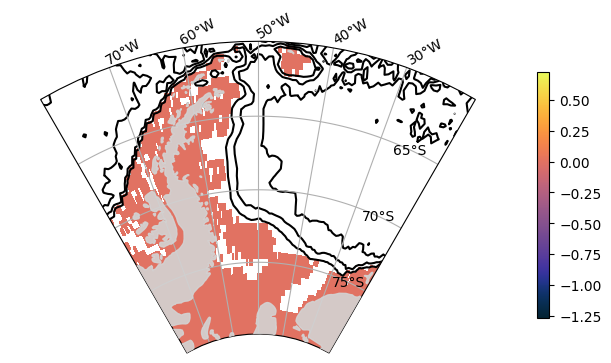

In [38]:
# Create a new figure and subplot with the specified projection
fig = plt.figure(figsize=(8, 8))
ax = setup_Weddell_Sea(fig)
im = ax.pcolormesh(lon, lat, t, transform=ccrs.PlateCarree(), cmap = cm.cm.thermal)
ax.add_feature(cfeature.LAND, color="lightgrey", alpha=0.9, zorder = 10)
ax.contour(lon, lat, depth, transform=ccrs.PlateCarree(), levels = np.linspace(-5000,0,5), colors = "k", linestyles = "solid")
plt.colorbar(im, orientation='vertical', shrink = 0.4);

In [ ]:
def setup_transect_view(fig):
    ax = fig.add_subplot(111, projection= ccrs.SouthPolarStereo(central_longitude= -50))
    # Limit the map to -60 degrees latitude and below.
    ax.set_extent([-70, -40, -72, -60], ccrs.PlateCarree())
    ax.gridlines(draw_labels=True)
    return ax

In [ ]:
# Create a new figure and subplot with the specified projection
fig = plt.figure(figsize=(5, 5))
ax = setup_transect_view(fig)
im = ax.contourf(lon, lat, temp300.T, transform=ccrs.PlateCarree(), levels = 20, vmin = -2.5, vmax = 3, cmap = cm.cm.thermal)
ax.add_feature(cfeature.LAND, color="darkgrey", zorder = 5)
# plot Antarctic Slope Front proxy 
ax.contour(lon, lat, temp300.T, transform=ccrs.PlateCarree(), levels = np.linspace(-0.7,-0.3,4), colors = "k", linestyles = "solid")
plt.colorbar(im, orientation='vertical', shrink = 0.8);
ax.plot([-55, -45], [-63, -64],
         color='tab:red', lw = 2,
         transform=ccrs.Geodetic())

In [ ]:
temp_in_time = ds.variables['Temp'][:,:,:,145]

In [ ]:
# https://stackoverflow.com/questions/16915966/using-matplotlib-animate-to-animate-a-contour-plot-in-python
import matplotlib.animation as animation

# Create a new figure and subplot with the specified projection
fig = plt.figure(figsize=(5, 5))
ax = setup_transect_view(fig)
ax.add_feature(cfeature.LAND, color="darkgrey", zorder = 5)
plt.colorbar(im, orientation='vertical', shrink = 0.8);
ax.plot([-55, -45], [-63, -64],
         color='tab:red', lw = 2,
         transform=ccrs.Geodetic())



# first image on screen
contf = ax.contourf(lon, lat, temp_in_time[:,:,0].T, transform=ccrs.PlateCarree(), levels = 20, vmin = -2.5, vmax = 3, cmap = cm.cm.thermal)
cb = plt.colorbar(contf)
# plot Antarctic Slope Front proxy 
#cont = ax.contour(lon, lat, temp_in_time[:,:,0].T, transform=ccrs.PlateCarree(), levels = np.linspace(-0.7,-0.3,4), colors = "k", linestyles = "solid")


# animation function
def animate(i):
    global contf
    global cont
    
    #delete previous frames
    for c in contf.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact
        
    # first image on screen
    contf = ax.contourf(lon, lat, temp_in_time[:,:,i].T, transform=ccrs.PlateCarree(), levels = 20, vmin = -2.5, vmax = 3, cmap = cm.cm.thermal)

    # plot Antarctic Slope Front proxy 
    cont = ax.contour(lon, lat, temp_in_time[:,:,i].T, transform=ccrs.PlateCarree(), levels = np.linspace(-0.7,-0.3,4), colors = "k", linestyles = "solid")

    plt.title(f't = {i}')
    return contf, cont

anim = animation.FuncAnimation(fig, animate, frames= len(time), interval = 500, repeat=True)
from IPython.display import HTML
HTML(anim.to_html5_video())
#anim.save('animation.mp4', writer=animation.FFMpegWriter())